Tujuan dari proyek ini adalah untuk melakukan visualisasi data menggunakan Python sekonkret dan sekonsisten mungkin. Dataset ini adalah kejahatan di wilayah metropolitan utama, seperti London yang terjadi dalam pola yang berbeda. Dataset ini mencakup jumlah laporan kriminal menurut bulan, wilayah LSOA, dan kategori mayor/minor dari Januari 2008 - Desember 2016. Dataset dapat diunduh melalui laman berikut: https://www.kaggle.com/datasets/jboysen/london-crime . 

# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

mpl.style.use(['ggplot']) # optional: for ggplot-like style

%matplotlib inline

In [2]:
stopwords = set(STOPWORDS)

# Data Loading

In [3]:
df_lcl = pd.read_csv('dataset\london_crime_by_lsoa.csv')

In [4]:
df_lcl.head() # menampilkan 5 data teratas

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df_lcl.tail() # menampilkan 5 data terakhir

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [6]:
df_lcl.shape # dimensi dataset

(13490604, 7)

In [7]:
df_lcl.info() # menampilkan informasi tipe-tipe kolom pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [8]:
df_lcl.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [9]:
df_lcl.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [10]:
# Menampilkan kolom minor category
print('minor_category',df_lcl.minor_category.unique())

minor_category ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops' 'Possession Of Drugs' 'Harassment'
 'Handling Stolen Goods' 'Criminal Damage To Dwelling'
 'Burglary in a Dwelling' 'Criminal Damage To Motor Vehicle'
 'Other Criminal Damage' 'Counted per Victim' 'Going Equipped'
 'Other Fraud & Forgery' 'Assault with Injury' 'Drug Trafficking'
 'Other Drugs' 'Business Property' 'Other Notifiable' 'Other Sexual'
 'Theft From Motor Vehicle' 'Rape' 'Murder']


In [11]:
# Menampilkan kolom major category
print('major_category',df_lcl.major_category.unique())

major_category ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [12]:
# Menampilkan kolom borough
print('borough',df_lcl.borough.unique())

borough ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']


In [13]:
# Melihat ada tidaknya missing values
print("To check if any columns has null values")
print(df_lcl.isnull().any())

To check if any columns has null values
lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool


In [14]:
df_lcl.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [15]:
df_lcl.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [16]:
# Melakukan penggantian nama
df_lcl.rename(columns={'borough':'District'}, inplace=True) # mengganti nama borough menjadi district
df_lcl.head()

,lsoa_code,District,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [17]:
print(df_lcl.shape)

(13490604, 7)


In [18]:
criminal = df_lcl[df_lcl['value'] == 1]

In [19]:
# Menampilkan data major category
df_lcl1 = df_lcl.copy()
df_lcl1.drop(['lsoa_code','minor_category'], axis=1, inplace=True)
df_lcl1

,District,major_category,value,year,month
0,Croydon,Burglary,0,2016,11
1,Greenwich,Violence Against the Person,0,2016,11
2,Bromley,Violence Against the Person,0,2015,5
3,Redbridge,Burglary,0,2016,3
4,Wandsworth,Robbery,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015,2
13490600,Hillingdon,Robbery,1,2015,6
13490601,Sutton,Burglary,0,2011,2
13490602,Croydon,Robbery,0,2011,5


In [20]:
# Menghitung banyaknya kejatahan burglary pada tahun 2016
burglary = df_lcl1[(df_lcl1['major_category'] == 'Burglary') & (df_lcl1['year'] == 2016)]
print(burglary.value.sum())

68285


In [21]:
# Mengelompokkan kolom district dan year
df_lcl_sum = df_lcl1.groupby(['year','District']).size().reset_index(name='count_per_year')
print(df_lcl_sum)
print(df_lcl_sum.columns)

     year              District  count_per_year
0    2008  Barking and Dagenham           34560
1    2008                Barnet           63648
2    2008                Bexley           42852
3    2008                 Brent           54516
4    2008               Bromley           58212
..    ...                   ...             ...
292  2016                Sutton           35832
293  2016         Tower Hamlets           45792
294  2016        Waltham Forest           45144
295  2016            Wandsworth           55404
296  2016           Westminster           40740

[297 rows x 3 columns]
Index(['year', 'District', 'count_per_year'], dtype='object')


In [22]:
# Menampilkan data major category
table = df_lcl1.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
table

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [23]:
# Menampilkan data minor category
df_lcl2 = df_lcl.copy()
df_lcl2.drop(['lsoa_code','major_category'], axis=1, inplace=True)
df_lcl2

,District,minor_category,value,year,month
0,Croydon,Burglary in Other Buildings,0,2016,11
1,Greenwich,Other violence,0,2016,11
2,Bromley,Other violence,0,2015,5
3,Redbridge,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Personal Property,1,2015,6
13490601,Sutton,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Business Property,0,2011,5


In [24]:
# Mengelompokkan kolom district dan year
df_lcl_sum = df_lcl2.groupby(['year','District']).size().reset_index(name='count_per_year')
print(df_lcl_sum)
print(df_lcl_sum.columns)

     year              District  count_per_year
0    2008  Barking and Dagenham           34560
1    2008                Barnet           63648
2    2008                Bexley           42852
3    2008                 Brent           54516
4    2008               Bromley           58212
..    ...                   ...             ...
292  2016                Sutton           35832
293  2016         Tower Hamlets           45792
294  2016        Waltham Forest           45144
295  2016            Wandsworth           55404
296  2016           Westminster           40740

[297 rows x 3 columns]
Index(['year', 'District', 'count_per_year'], dtype='object')


In [25]:
# Menampilkan data minor category
table1 = df_lcl2.pivot_table(values='value', index=['year'],columns=['minor_category'], aggfunc=np.sum, fill_value=0)
table1

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,24453,7721,26663,64228,268,76570,32857,28303,15895,8701
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,27549,7571,26453,56070,0,68856,36349,24476,20721,10005
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,29547,6947,29300,54026,0,69709,36935,24890,19726,8033
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,36090,6414,33994,52769,0,69604,36351,26161,20885,7628
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,46585,6623,32810,47491,0,68198,36562,22464,21339,7151
2013,39929,30685,56537,2026,37882,0,13512,23452,6367,4151,...,44964,7628,27311,45755,0,63509,36441,20377,18708,15526
2014,45677,27078,48975,1642,51244,0,13391,24137,6641,3830,...,30957,7785,20508,40309,0,52167,40141,21653,17186,21556
2015,48164,25833,44656,1718,61758,0,13648,25595,6776,3395,...,33829,9501,19665,36097,0,50024,42549,21848,16513,23431
2016,50038,25289,42996,1654,64440,0,13951,25787,6700,3392,...,34868,10588,20874,35203,0,51319,46957,26366,18001,23525


## LINE PLOT

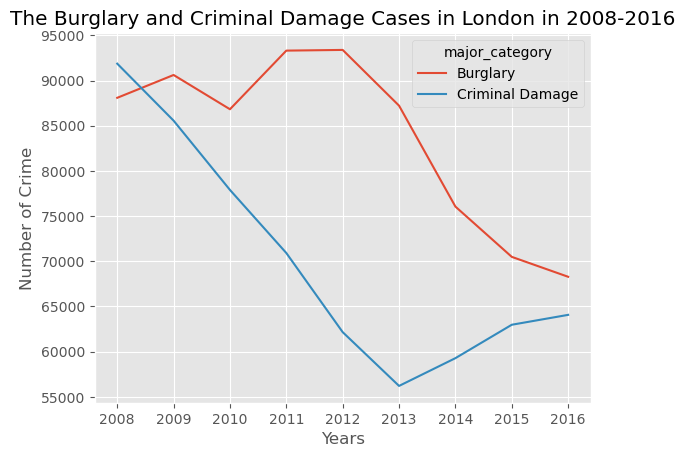

In [26]:
table_line = table[['Burglary', 'Criminal Damage']]
table_line.index = table_line.index.map(int)
table_line.plot(kind='line')

plt.title('The Burglary and Criminal Damage Cases in London in 2008-2016')
plt.ylabel('Number of Crime')
plt.xlabel('Years')

plt.show()

### Analisis
Grafik di atas menunjukkan tingkat kejahatan burglary dan criminal damage di London pada rentang waktu 2008-2016. Kejahatan burglary pada tahun 2008-2012 bergerak secara fluktuatif, tetapi pada rentang tahun 2012-2016 mengalami penurunan yang signifikan. Pada kejahatan criminal damage tahun 2008-2013 mengalami penurunan yang signifikan, tetapi pada 2013-2016 mengalami kenaikan.

## AREA PLOT

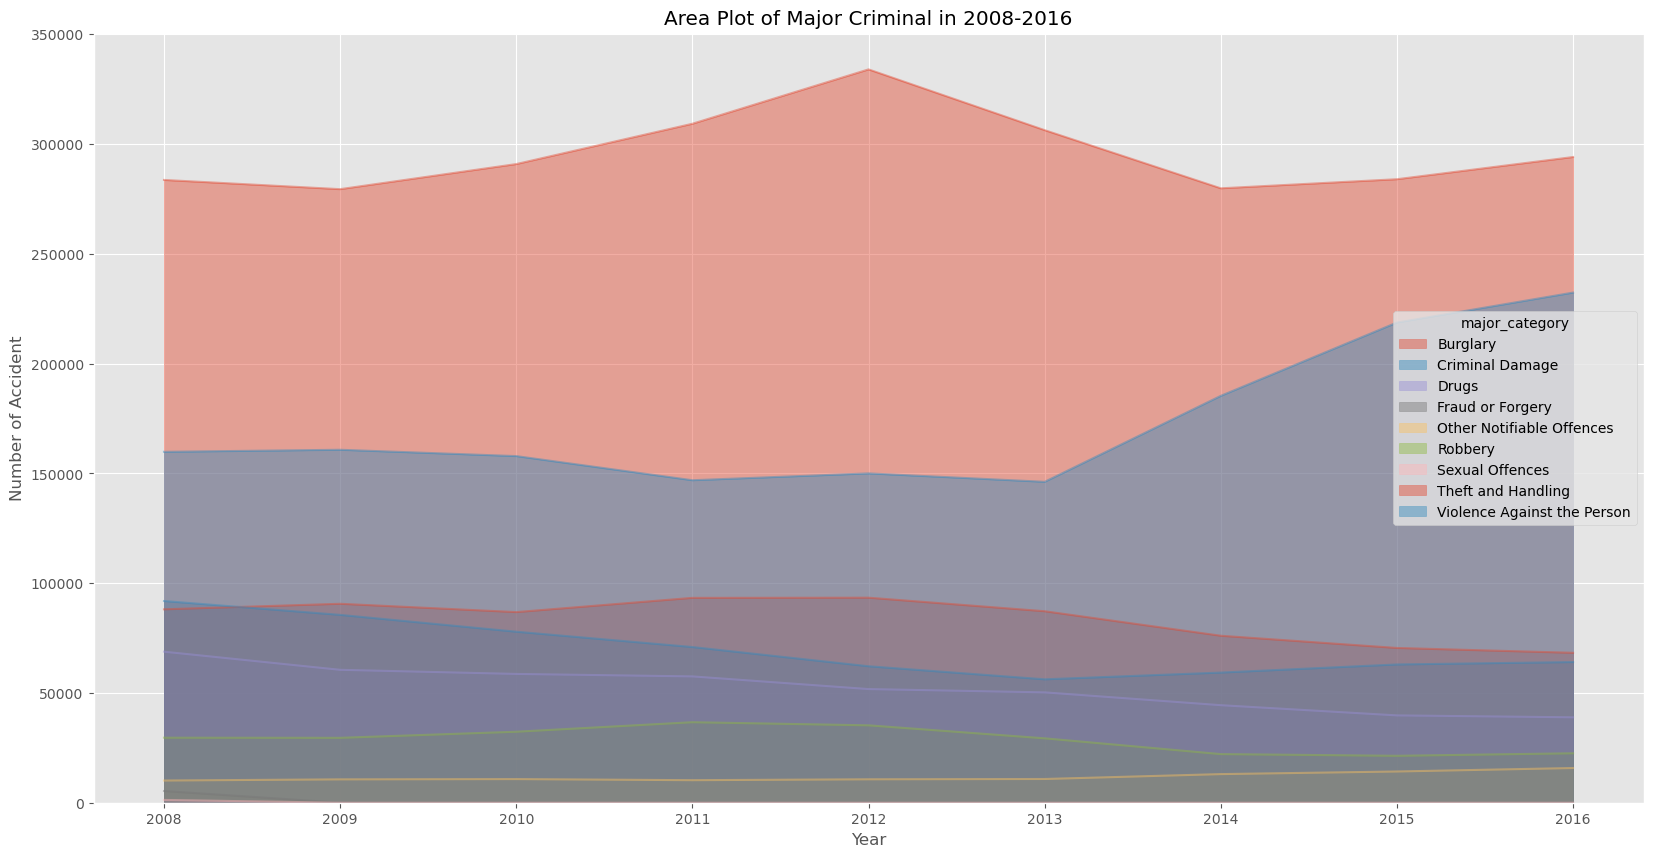

In [27]:
table.plot(kind='area',
            alpha=0.45,
            stacked=False,
            figsize=(20, 10),
            )

plt.title('Area Plot of Major Criminal in 2008-2016')
plt.ylabel('Number of Accident')
plt.xlabel('Year')

plt.show()

### Analisis
Pada grafik di atas menunjukkan tingkat major criminal di London tahun 2008-2016 yang didominasi pada kejahatan theft and handling.

## HISTOGRAM

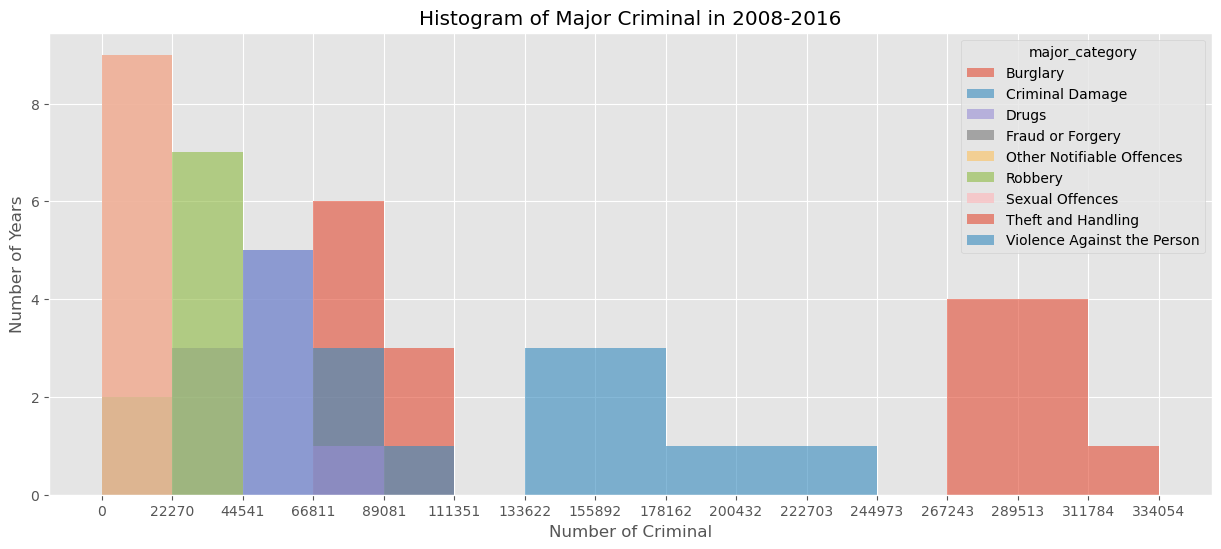

In [28]:
count, bin_edges = np.histogram(table, 15)
table.plot(kind ='hist',
            figsize=(15, 6),
            bins=15,
            alpha=0.6,
            xticks=bin_edges,
            )

plt.title('Histogram of Major Criminal in 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal')

plt.show()

### Analisis
Kejatahan yang paling banyak jumlahnya di London dalam rentang waktu 2008-2016 adalah theft and handling.

## BAR CHART

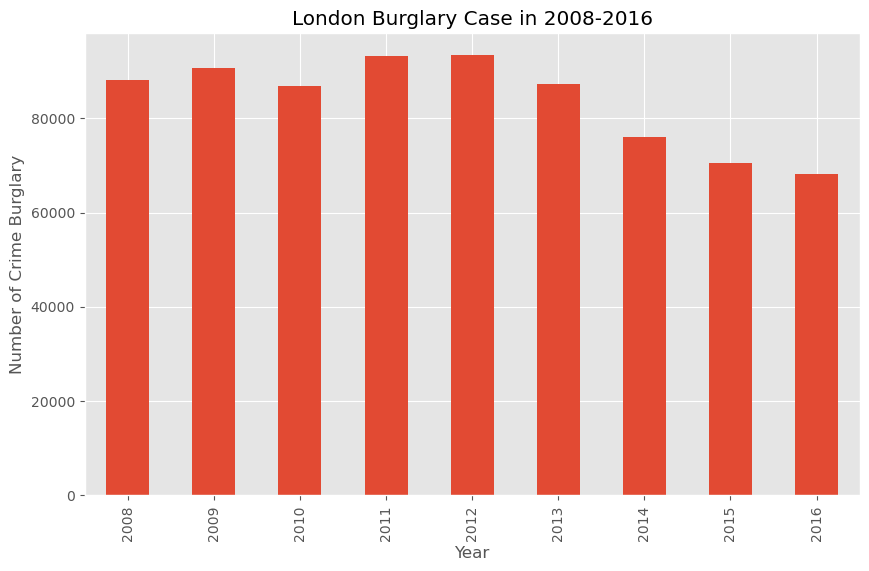

In [29]:
table_bar = table['Burglary']
table_bar.plot(kind='bar', figsize=(10, 6))

plt.title('London Burglary Case in 2008-2016')
plt.ylabel('Number of Crime Burglary')
plt.xlabel('Year')

plt.show()

### Analisis
Grafik di atas menunjukkan bahwa kejahatan burglary di London rentang tahun 2008-2016 bergerak secara fluktuatif, tetapi pada 5 tahun terakhir mengalami penurunan.

## PIE CHART

In [30]:
table_pie = table.transpose()
table_pie['total'] = table.sum()
table_pie

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


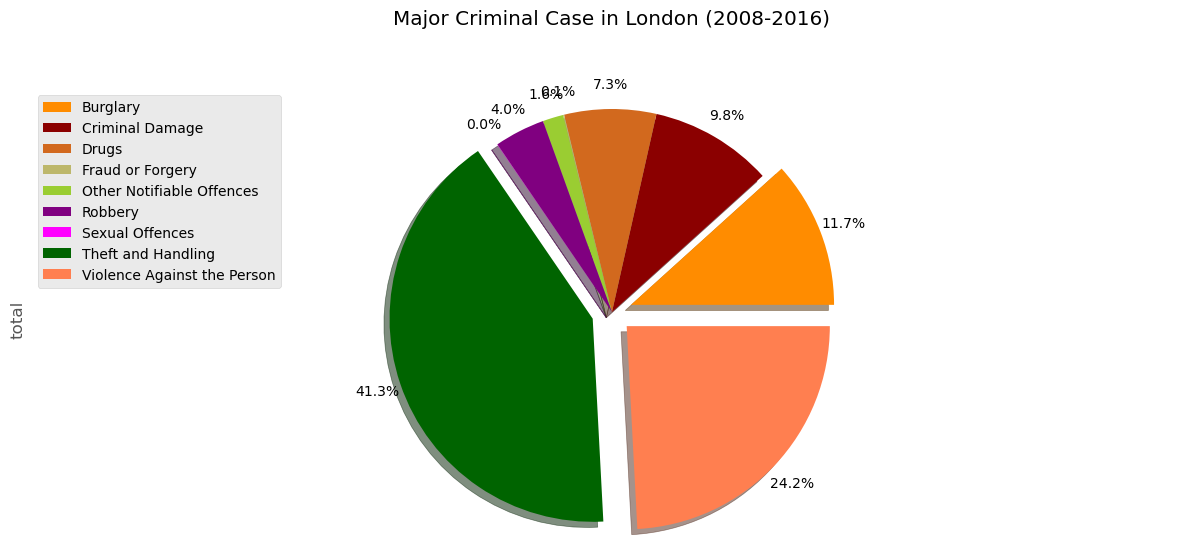

In [31]:
colors_list = ['darkorange', 'darkred', 'chocolate', 'darkkhaki', 'yellowgreen', 'purple', 'magenta', 'darkgreen', 'coral']
explode_list = [0.1, 0, 0, 0, 0, 0, 0, 0.1, 0.1]

table_pie['total'].plot(kind='pie',
                        figsize=(15, 6),
                        autopct='%1.1f%%',
                        shadow=True,
                        labels=None,
                        colors=colors_list,
                        pctdistance=1.12,
                        explode=explode_list
                        )

plt.title('Major Criminal Case in London (2008-2016)', y=1.12)

plt.axis('equal')

plt.legend(labels=table_pie.index, loc='upper left')

plt.show()

### Analisis
Dapat disimpulkan bahwa kejahatan besar di London rentang tahun 2008-2016 yang memiliki persentase paling banyak adalah theft and handling dengan persentase sebanyak 41,3%.

## BOX PLOT

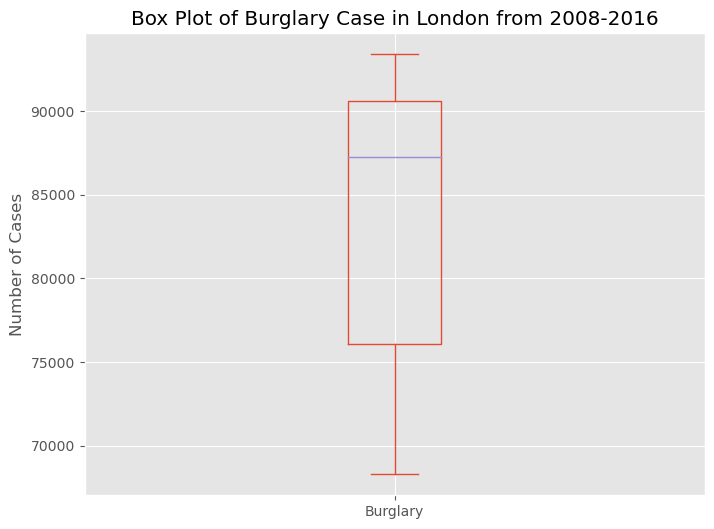

In [32]:
table_bar.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Burglary Case in London from 2008-2016')
plt.ylabel('Number of Cases')

plt.show()

### Analisis
Angka kejahatan paling tinggi pada kejahatan burglary di London rentang tahun 2008-2016 dibawah 95000 kasus.

## SCATTER PLOT

In [33]:
table1_scatter = table1[['Personal Property','Common Assault']]
table1_scatter = table1_scatter.reset_index()
table1_scatter

minor_category,year,Personal Property,Common Assault
0,2008,26663,37356
1,2009,26453,39671
2,2010,29300,41591
3,2011,33994,40502
4,2012,32810,39246
5,2013,27311,37882
6,2014,20508,51244
7,2015,19665,61758
8,2016,20874,64440


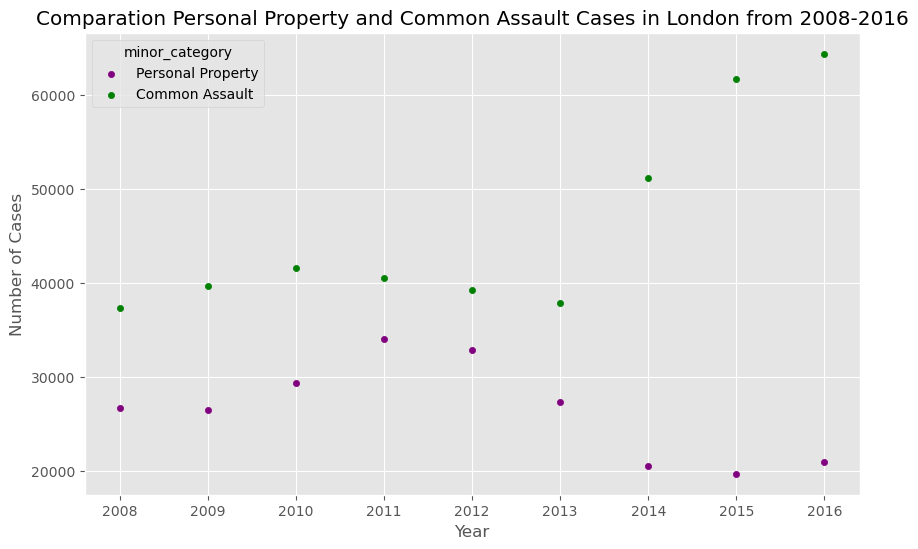

In [34]:
ax1 = table1_scatter.plot(kind='scatter', x='year', y='Personal Property', figsize=(10, 6), color='purple', label='Personal Property')
ax2 = table1_scatter.plot(kind='scatter', x='year', y='Common Assault', figsize=(10, 6), color='green', label='Common Assault', ax=ax1)

plt.title('Comparation Personal Property and Common Assault Cases in London from 2008-2016')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

### Analisis
Perbandingan kasus personal property dan common assault di London tahun 2008-2016, yaitu sama bergerak secara fluktuatif, bedanya jika personal property pada 4 tahun terakhir mengalami kenaikan yang signifikan, sedangkan kasus common assault pada tahun 2011-2015 mengalami penurunan kemudian bergerak naik lagi sehingga bergerak secara fluktuatif.

## WORD CLOUDS

In [35]:
dataset = ' '.join(df_lcl.major_category)

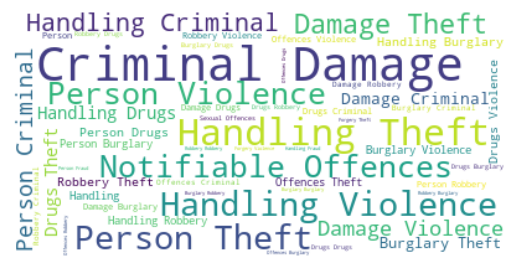

In [36]:
ywordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)


ywordcloud.generate(dataset)

plt.imshow(ywordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

### Analisis
Dapat disimpulkan bahwa kata yang sering muncul adalah criminal damage.

## FOLIUM MAPS

In [37]:
df_lcl.head()

,lsoa_code,District,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [38]:
df_lcl.shape

(13490604, 7)

In [39]:
limit = 100
df_lclic = df_lcl.iloc[0:limit, :]

In [40]:
df_lclic.shape

(100, 7)

In [41]:
latitude = 51.50735
longitude = -0.12776

In [42]:
#url ='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'
#urllib.request.urlretrieve(url, 'world_countries.json')
#with urlopen('https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json') as response:
#    world_geo = json.load(response)
print("Crime Rate in District of London")
print("please zoom in to view the map")
df_lcl3=df_lcl[['District','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[latitude,longitude], zoom_start=13)

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df_lcl3,
    columns=['District', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in District of London'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)

Crime Rate in District of London
please zoom in to view the map


C:\Users\HP\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


### Analisis
Dapat disimpulkan bahwa ada satu wilayah yang memiliki tingkat kejahatan dalam rentang 4.2-5.0 dan mayoritas wilayahnya memiliki tingkat kejahatan 0.8 dilihat dari data di atas.